In [89]:
import pandas
import spacy
import pandas as pd
import os
from spacy import displacy
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
nlp = spacy.load("ru_core_news_sm")

In [91]:
df = pd.DataFrame()
directory = 'Посты_со_стены_сообщества_ханты_10142022202210140650537081160000'

for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    data = pd.read_excel(f)
    df = pd.concat([df, data])

copy_text = df['copy_text']
copy_text.iloc[2]

'Сегодня в рамках проекта «Интерактивные встречи «КДМ собирает друзей» прошла очередная экскурсия "Молодые герои Зауралья".  Ребята из 12 лицея прошли 2 блока экскурсионной программы: 📌Интерактивная выставка "Молодые герои Зауралья" 📌Настольная тематическая игра.  Мужество и героизм молодых людей становятся примерами для подражания и всеобщей гордости.   Храним историю. Помним.   ❗ПРЕДВАРИТЕЛЬНАЯ ЗАПИСЬ ОБЯЗАТЕЛЬНА. Дополнительную информацию можно получить по телефону 89129722748 (Федорова Снежана Дмитриевна, специалист по работе с молодежью МБУ «Курганский Дом молодежи»).    #кдм45'

In [92]:
posts = ""
for i in range(df.shape[0]):
    if not pd.isnull(post := copy_text.iloc[i]):
        posts += str(post) + "\n"

posts

'Молодым парламентариям Курганской области - 10 лет!  27 сентября 2012 года была зарегистрирована [club35608492|Региональная общественная организация "Молодые парламентарии Курганской области"].  Инициаторами создания объединения стали активисты Общественной молодёжной палаты при Курганской областной Думе. Председателем новой НКО был избран [id19345804|Станислав Бессонов], который и сейчас продолжает руководить организацией.  За 10 лет объединение прошло путь от маленькой инициативной группы до сильной ресурсной организации, одной из самых известных некоммерческих организаций региона. "Молодые парламентарии" сегодня - это: - уникальные проекты, ставшие современными зауральскими брендами - "Молодые Герои", "Народы Зауралья" - более 400 000 участников проектов и 5 000 мероприятий организации - более 1 000 волонтёров - собственная площадка - мультицентр "Смолин" - акции организации проходили во всех (!) 9 городах, 6 посёлках городского типа и 419 сельсоветах Курганской области - 24 гранта

In [93]:
doc = nlp(posts)

In [94]:
for token in doc:
    if token.pos_ == 'PROPN':
        token_text = token.text
        token_pos = token.pos_
        token_dep = token.dep_
        token_head = token.head.text
        print(f"{token_text:<12}{token_pos:<10}" \
        f"{token_dep:<10}{token_head:<12}")


Думе        PROPN     nmod      активисты   
НКО         PROPN     nmod      Председателем
id19345804|СтаниславPROPN     nsubj:passизбран      
Бессонов    PROPN     flat:name id19345804|Станислав
Герои       PROPN     obj       ставшие     
Зауралья    PROPN     nmod      Народы      
Смолин      PROPN     appos     мультицентр 
про45       PROPN     appos     смолин45    
мпрф        PROPN     appos     курган      
Зауралья    PROPN     nmod      герои       
Зауралья    PROPN     nmod      герои       
ЗАПИСЬ      PROPN     nmod      ПРЕДВАРИТЕЛЬНАЯ
ОБЯЗАТЕЛЬНА PROPN     nmod      ЗАПИСЬ      
Федорова    PROPN     parataxis 89129722748 
Снежана     PROPN     flat:name Федорова    
Дмитриевна  PROPN     flat:name Федорова    
МБУ         PROPN     nmod      молодежью   
Зауралья    PROPN     nmod      Герои       
Героев      PROPN     nmod      грант       
моё         PROPN     parataxis 13-й        
Кургане     PROPN     obl       представлены
про45       PROPN     appos     🏻  

In [95]:
for ent in doc.ents:
    print(ent.text, ent.label_)

Курганской области LOC
club35608492|Региональная общественная организация "Молодые парламентарии ORG
Курганской области LOC
Общественной молодёжной палаты ORG
Курганской областной Думе ORG
НКО ORG
Бессонов PER
Смолин ORG
Курганской области LOC
Курганской области LOC
КДМ ORG
Зауралья LOC
Федорова PER
Снежана Дмитриевна PER
МБУ «Курганский Дом молодежи» ORG
Кургане LOC
Виталия Нохрина PER
Военно - Исторического Клуба «Курган» ORG
Пономарёва Виктора PER
Виталий Нохрин PER
ВИК «Курган» ORG
Виталий Нохрин PER
ВИК "Курган" ORG
Пограничники Зауралья ORG
Виталий Нохрин PER
Виталий Нохрин PER
Кургане LOC
Зауралья LOC
Советского Союза LOC
Курганской области LOC
Молодёжное движение "Молодые герои ORG
ГОЛОС МОЛОДОСТИ И ORG
Зауралья LOC
Зауралья LOC
Курганской области LOC
club205606768|Президентского фонда культурных инициатив ORG
Смолин ORG
Курган LOC
Куйбышева PER
id11138064|89128357055 ORG
Курган LOC
Куйбышева PER
Смолин ORG
Притобольной ЦБ ORG
Воронежская областная детская библиотека ORG
Советс

Всего было распознано 6668 именованных единиц на основе обработанного материала

In [96]:
displacy.render(doc, style="ent")

[('Югры', 236), ('России', 176), ('Севера', 173), ('Ханты', 148), ('Зауралья', 118), ('па', 68), ('Сибири', 62), ('ханты', 54), ('Нумас', 54), ('Маа', 50), ('манси', 50), ('Федерации', 49), ('РФ', 48), ('Союза', 43), ('Мансийске', 40), ('Югра', 40), ('В.', 40), ('Победы', 37), ('МГИМО', 35), ('Васильевна', 35)]


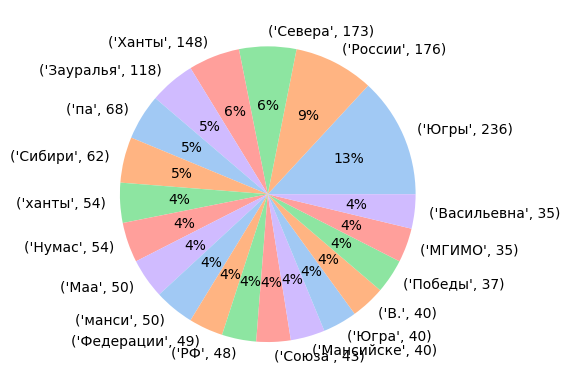

In [112]:
prop = [token.text
         for token in doc
         if (not token.is_stop and
             not token.is_punct and
             token.pos_ == "PROPN")]
prop_freq = Counter(prop)
common_props = prop_freq.most_common(20)
print(common_props)
labels = common_props
colors = sns.color_palette('pastel')[ 0:5 ]
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

Выше мы видим десять самых частотных слов в публикациях хантыйских сообществ. Анализ предоставлен на основе последних и чаще всего недавних постов, поэтому возможно сделать выводы об актуальной повестке дня.

[('Ювана Шесталова', 21), ('Ма', 14), ('Кондратьева', 10), ('Полина Шилко', 9), ('Вой Турам', 8), ('Виктор', 8), ('Югры', 8), ('Александр Новьюхов', 7), ('Лямина', 7), ('Олькова', 7), ('Таня', 7), ('Жукова', 6), ('Иван', 6), ('Валентина Тайбина', 6), ('Манэм', 6), ('Река Васюган', 6), ('Дина Васильевна', 6), ('Ольга Васильевна', 6), ('Мария Яковлевна', 6), ('Евы Шмидт', 6)]


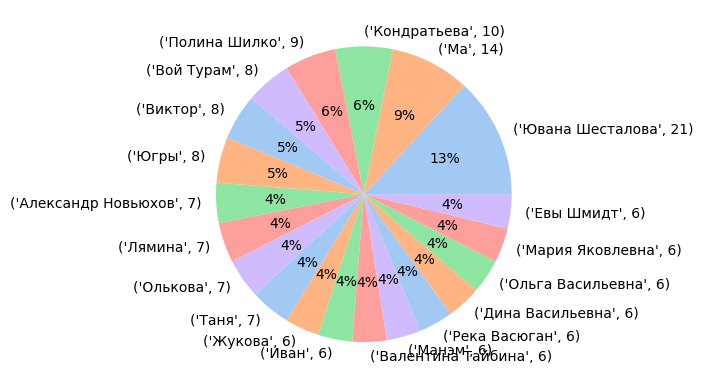

In [110]:
persons = [ent.text
         for ent in doc.ents
         if (
             ent.label_== "PER")]
pers_freq = Counter(persons)
common_pers = pers_freq.most_common(20)
print(common_pers)
labels = common_pers
colors = sns.color_palette('pastel')[ 0:5 ]
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

Выведем слова, с которыми употреблялись самые часто упоминаемые личности

In [99]:
for token in doc:
    if token.pos_ == 'PROPN':
        token_text = "Шесталов"
        token_pos = token.pos_
        token_dep = token.dep_
        token_head = token.head.text
        token_head_pos = token.head.pos_
        print(f"{token_text:<12}{token_pos:<10}" \
        f"{token_dep:<10}{token_head:<12}{token_head_pos:<12}",
              [child for child in token.children])

Шесталов    PROPN     nmod      активисты   NOUN         [при, Курганской, областной]
Шесталов    PROPN     nmod      ПредседателемNOUN         [новой]
Шесталов    PROPN     nsubj:passизбран      VERB         [[, Бессонов, ], продолжает]
Шесталов    PROPN     flat:name id19345804|СтаниславPROPN        []
Шесталов    PROPN     obj       ставшие     VERB         [", Молодые, ", Народы]
Шесталов    PROPN     nmod      Народы      NOUN         []
Шесталов    PROPN     appos     мультицентр NOUN         [", ", -, акции, организации]
Шесталов    PROPN     appos     смолин45    NUM          [#, курган]
Шесталов    PROPN     appos     курган      NOUN         [#, 
]
Шесталов    PROPN     nmod      герои       NOUN         []
Шесталов    PROPN     nmod      герои       NOUN         []
Шесталов    PROPN     nmod      ПРЕДВАРИТЕЛЬНАЯNOUN         [ОБЯЗАТЕЛЬНА]
Шесталов    PROPN     nmod      ЗАПИСЬ      PROPN        []
Шесталов    PROPN     parataxis 89129722748 NUM          [(, Снежана, Дмитриевн

In [100]:
for token in doc:
    if token.pos_ == 'PROPN':
        token_text = "Новьюхов"
        token_pos = token.pos_
        token_dep = token.dep_
        token_head = token.head.text
        token_head_pos = token.head.pos_
        print(f"{token_text:<12}{token_pos:<10}" \
        f"{token_dep:<10}{token_head:<12}{token_head_pos:<12}",
              [child for child in token.children])

Новьюхов    PROPN     nmod      активисты   NOUN         [при, Курганской, областной]
Новьюхов    PROPN     nmod      ПредседателемNOUN         [новой]
Новьюхов    PROPN     nsubj:passизбран      VERB         [[, Бессонов, ], продолжает]
Новьюхов    PROPN     flat:name id19345804|СтаниславPROPN        []
Новьюхов    PROPN     obj       ставшие     VERB         [", Молодые, ", Народы]
Новьюхов    PROPN     nmod      Народы      NOUN         []
Новьюхов    PROPN     appos     мультицентр NOUN         [", ", -, акции, организации]
Новьюхов    PROPN     appos     смолин45    NUM          [#, курган]
Новьюхов    PROPN     appos     курган      NOUN         [#, 
]
Новьюхов    PROPN     nmod      герои       NOUN         []
Новьюхов    PROPN     nmod      герои       NOUN         []
Новьюхов    PROPN     nmod      ПРЕДВАРИТЕЛЬНАЯNOUN         [ОБЯЗАТЕЛЬНА]
Новьюхов    PROPN     nmod      ЗАПИСЬ      PROPN        []
Новьюхов    PROPN     parataxis 89129722748 NUM          [(, Снежана, Дмитриевн